In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

sns.set()
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.shape

(4024, 16)

In [5]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

<Axes: >

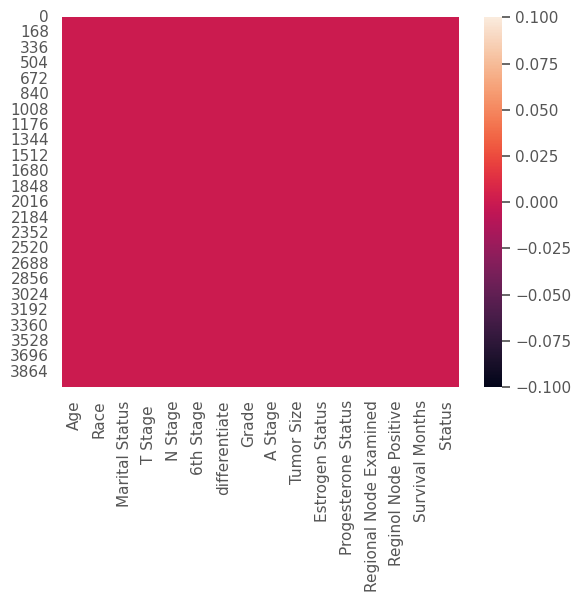

In [6]:
sns.heatmap(df.isna())

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace = True)


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   object
 2   Marital Status          4023 non-null   object
 3   T Stage                 4023 non-null   object
 4   N Stage                 4023 non-null   object
 5   6th Stage               4023 non-null   object
 6   differentiate           4023 non-null   object
 7   Grade                   4023 non-null   object
 8   A Stage                 4023 non-null   object
 9   Tumor Size              4023 non-null   int64 
 10  Estrogen Status         4023 non-null   object
 11  Progesterone Status     4023 non-null   object
 12  Regional Node Examined  4023 non-null   int64 
 13  Reginol Node Positive   4023 non-null   int64 
 14  Survival Months         4023 non-null   int64 
 15  Status   

In [11]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


## ANALYSIS

In [12]:
df['Status'].value_counts()

Status
Alive    3407
Dead      616
Name: count, dtype: int64

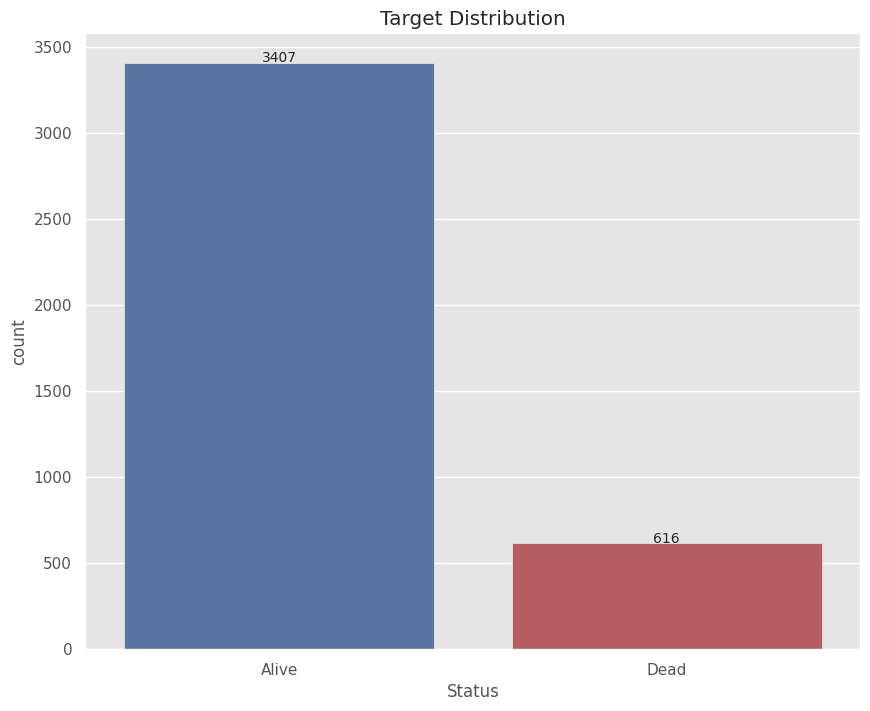

In [13]:
plt.figure(figsize=(10, 8))

vis=sns.countplot(x = df['Status'] , data = df , palette = ['b','r'])

for p in vis.patches:
    vis.text(p.get_x() + p.get_width() / 2., p.get_height() + 3 , f'{int(p.get_height())}', ha="center")

plt.title('Target Distribution')
plt.show()

## transform data

In [14]:
lab =LabelEncoder()


In [15]:
obj = df.select_dtypes(include= 'object')
non_obj = df.select_dtypes(exclude= 'object')

In [16]:
obj

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive
...,...,...,...,...,...,...,...,...,...,...,...
4019,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4020,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4021,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,Alive
4022,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,Alive


In [17]:
non_obj

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50
...,...,...,...,...,...
4019,62,9,1,1,49
4020,56,46,14,8,69
4021,68,22,11,3,69
4022,58,44,11,1,72


In [18]:
for i in range(0 ,obj.shape[1]):
    obj.iloc[:,i] =lab.fit_transform(obj.iloc[:,i])

In [19]:
obj

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,3,1,1,1,0
1,2,1,1,1,2,0,2,1,1,1,0
2,2,0,2,2,4,0,2,1,1,1,0
3,2,1,0,0,0,1,3,1,1,1,0
4,2,1,1,0,1,1,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0
4020,2,0,1,1,2,0,2,1,1,1,0
4021,2,1,1,0,1,0,2,1,1,0,0
4022,0,0,1,0,1,0,2,1,1,1,0


In [20]:
obj = obj.astype('int')

In [21]:
df = pd.concat([obj, non_obj],axis =1)

In [22]:
df

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0,62,9,1,1,49
4020,2,0,1,1,2,0,2,1,1,1,0,56,46,14,8,69
4021,2,1,1,0,1,0,2,1,1,0,0,68,22,11,3,69
4022,0,0,1,0,1,0,2,1,1,1,0,58,44,11,1,72


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Race                    4023 non-null   int64
 1   Marital Status          4023 non-null   int64
 2   T Stage                 4023 non-null   int64
 3   N Stage                 4023 non-null   int64
 4   6th Stage               4023 non-null   int64
 5   differentiate           4023 non-null   int64
 6   Grade                   4023 non-null   int64
 7   A Stage                 4023 non-null   int64
 8   Estrogen Status         4023 non-null   int64
 9   Progesterone Status     4023 non-null   int64
 10  Status                  4023 non-null   int64
 11  Age                     4023 non-null   int64
 12  Tumor Size              4023 non-null   int64
 13  Regional Node Examined  4023 non-null   int64
 14  Reginol Node Positive   4023 non-null   int64
 15  Survival Months         40

In [24]:
df['Status'].unique()

array([0, 1])

## creat model

In [25]:
x = df.drop(['Status'], axis =1 )
y =df['Status']

In [26]:
ros =  RandomOverSampler(random_state= 30)
x_ros,y_ros = ros.fit_resample( x, y)

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x_ros,y_ros ,test_size = 0.2 , random_state = 40)

In [28]:
model1 = KNeighborsClassifier()
model2 =SVC(kernel='rbf', degree=3, gamma='auto')
model3 =GradientBoostingClassifier()
model4 =RandomForestClassifier(n_estimators = 100 , n_jobs = 1,random_state =40)
model5 =LogisticRegression()
model6 =XGBClassifier()

In [29]:
def all_models (model) :
    model.fit(x_train, y_train)
    pre= model.predict(x_test)
    model.score(x_test,y_test)
    print(classification_report (y_test,pre))
    

In [30]:
all_models(model1)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       698
           1       0.79      0.93      0.85       665

    accuracy                           0.84      1363
   macro avg       0.85      0.84      0.84      1363
weighted avg       0.85      0.84      0.84      1363



In [31]:
all_models(model2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.99      0.99      0.99       665

    accuracy                           0.99      1363
   macro avg       0.99      0.99      0.99      1363
weighted avg       0.99      0.99      0.99      1363



In [32]:
all_models(model3)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       698
           1       0.86      0.77      0.81       665

    accuracy                           0.83      1363
   macro avg       0.83      0.83      0.83      1363
weighted avg       0.83      0.83      0.83      1363



In [33]:
all_models(model4)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       698
           1       0.94      0.99      0.97       665

    accuracy                           0.97      1363
   macro avg       0.97      0.97      0.97      1363
weighted avg       0.97      0.97      0.97      1363



In [34]:
all_models(model5)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       698
           1       0.79      0.77      0.78       665

    accuracy                           0.79      1363
   macro avg       0.79      0.79      0.79      1363
weighted avg       0.79      0.79      0.79      1363



In [35]:
all_models(model6)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       698
           1       0.93      0.97      0.95       665

    accuracy                           0.95      1363
   macro avg       0.95      0.95      0.95      1363
weighted avg       0.95      0.95      0.95      1363



# the best models is SVC and RandomForestClassifier